Flores Lara Alberto 6BV1

Clasificación para CIFAR usando CNN

Librerias necesarias:

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import time

Definir las funciones para crear la CNN y para el entrenamiento y validación del modelo

In [12]:
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=64):
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    end_time = time.time()

    # Evaluación
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred, target_names=[f'Clase {i}' for i in range(10)])
    print(report)
    print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

    return history, end_time - start_time

Cargar los datos de entrada

In [13]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [14]:
model_cnn = build_cnn((32, 32, 3))
history_cnn, time_cnn = train_and_evaluate(model_cnn, x_train, y_train_cat, x_test, y_test_cat)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2666 - loss: 1.9905 - val_accuracy: 0.3749 - val_loss: 1.7352
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4158 - loss: 1.6177 - val_accuracy: 0.4484 - val_loss: 1.5580
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4536 - loss: 1.5243 - val_accuracy: 0.4267 - val_loss: 1.5929
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4814 - loss: 1.4561 - val_accuracy: 0.4765 - val_loss: 1.4766
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4902 - loss: 1.4262 - val_accuracy: 0.4751 - val_loss: 1.4927
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5017 - loss: 1.4041 - val_accuracy: 0.4819 - val_loss: 1.4617
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5091 - loss: 1.3947 - val_accuracy: 0.4656 - val_loss: 1.5305
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5173 - loss: 1.3625 - 

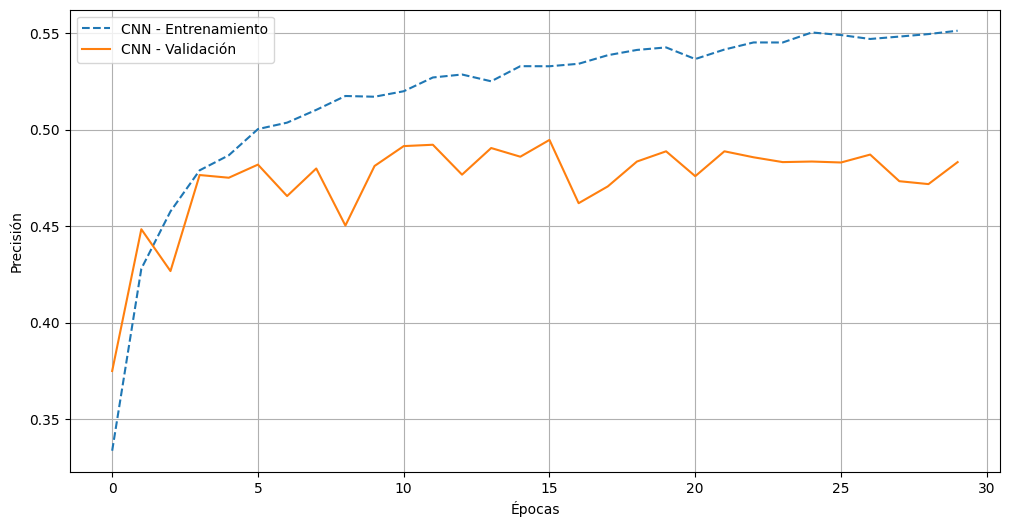

In [15]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn], ['CNN'])


Clasificación para Mnist usando CNN

Cargar los datos de entrada

In [16]:
# Cargar Mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape para agregar el canal de color (1 para MNIST)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [18]:
model_cnn = build_cnn((28, 28, 1))
history_cnn, time_cnn = train_and_evaluate(model_cnn, x_train, y_train_cat, x_test, y_test_cat, 10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9100 - loss: 0.2943 - val_accuracy: 0.9812 - val_loss: 0.0590
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9800 - loss: 0.0639 - val_accuracy: 0.9822 - val_loss: 0.0618
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9849 - loss: 0.0530 - val_accuracy: 0.9827 - val_loss: 0.0562
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9877 - loss: 0.0417 - val_accuracy: 0.9835 - val_loss: 0.0662
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9881 - loss: 0.0436 - val_accuracy: 0.9835 - val_loss: 0.0637
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9885 - loss: 0.0410 - val_accuracy: 0.9816 - val_loss: 0.0674
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9894 - loss: 0.0395 - val_accuracy: 0.9833 - val_loss: 0.0781
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9898 - loss: 0.0397 - 

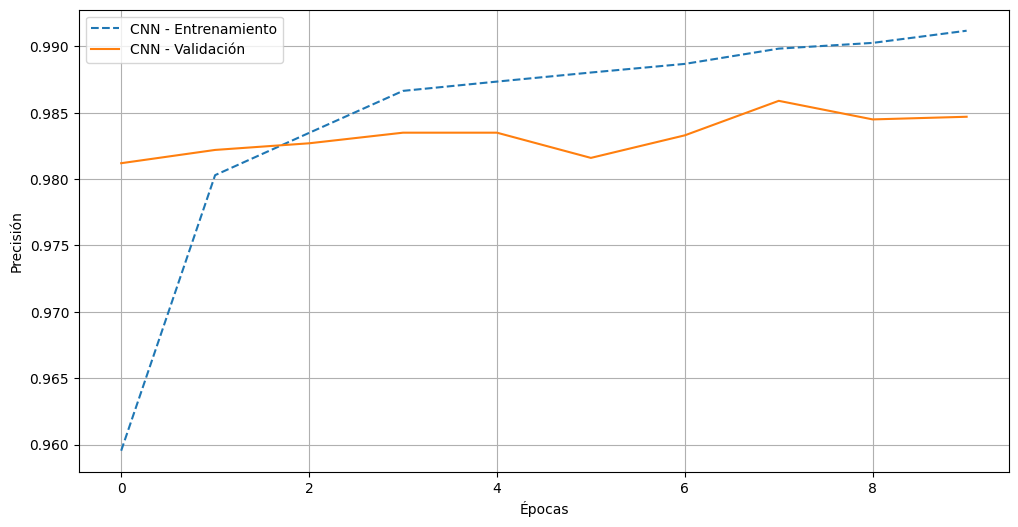

In [19]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn], ['CNN'])
